# Step 1: Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Step 2: Load the Dataset**

In [ ]:
df = pd.read_csv('/content/Order_Data_meriskill.csv')

<ipython-input-220-54a7c9cc6ba6>:1: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Order_Data_meriskill.csv')


In [ ]:
# Display the first few rows
df.head(5)

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [ ]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55910 entries, 0 to 55909
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            55910 non-null  object 
 1   Region             55910 non-null  object 
 2   Country            55910 non-null  object 
 3   CustID             55910 non-null  object 
 4   Customer_Name      55907 non-null  object 
 5   ProductSKU         55910 non-null  object 
 6   Product_Category   55910 non-null  object 
 7   OrderLineItem      55910 non-null  int64  
 8   OrderQuantity      55910 non-null  float64
 9   ProductCost        55910 non-null  float64
 10  ProductPrice       55910 non-null  object 
 11  OrderDate          55910 non-null  object 
 12  AcquisitionSource  55909 non-null  object 
 13  TransactionID      55910 non-null  object 
 14  Fraud              55207 non-null  object 
 15  PaymentMethod      55910 non-null  object 
 16  CardType           506

In [ ]:
# Check for missing values
print(df.isnull().mean()*100)

OrderID               0.000000
Region                0.000000
Country               0.000000
CustID                0.000000
Customer_Name         0.005366
ProductSKU            0.000000
Product_Category      0.000000
OrderLineItem         0.000000
OrderQuantity         0.000000
ProductCost           0.000000
ProductPrice          0.000000
OrderDate             0.000000
AcquisitionSource     0.001789
TransactionID         0.000000
Fraud                 1.257378
PaymentMethod         0.000000
CardType              9.341799
Gender               11.318190
dtype: float64


# Step 3: Data Cleaning

In [ ]:
df['CardType'].value_counts()

,count
CardType,
VISA,30168
MC,13596
AMEX,5599
DISCOVER,1241
JCB,83


In [ ]:
# Fill missing values in 'CardType' and 'Gender' with 'Unknown'
df['CardType'].fillna('Unknown', inplace=True)
df['Gender'].fillna('Unknown', inplace=True)

<ipython-input-225-913e80f28ccc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CardType'].fillna('Unknown', inplace=True)
<ipython-input-225-913e80f28ccc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='mixed', dayfirst=True, errors='coerce')


In [ ]:
# Drop unnecessary columns (e.g., TransactionID)
df.drop(columns=['TransactionID'], inplace=True)

In [ ]:
# Check for duplicates and remove them
print(f"Number of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicates: 0


# **Step 4: Feature Engineering**

In [ ]:
df.keys()

Index(['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU',
       'Product_Category', 'OrderLineItem', 'OrderQuantity', 'ProductCost',
       'ProductPrice', 'OrderDate', 'AcquisitionSource', 'Fraud',
       'PaymentMethod', 'CardType', 'Gender'],
      dtype='object')

In [ ]:
# df['ProductPrice'] = df['ProductPrice'].replace({'16-08-2021': '0'}, regex=True)

In [ ]:
df = df[~df['ProductPrice'].astype(str).str.match(r'\d{2}-\d{2}-\d{4}')]

In [ ]:
#First i convert Productprice into a int type
df['ProductPrice'] = df['ProductPrice'].astype('float')
# Calculate profit for each order
df['profit'] = df['ProductPrice']-df['ProductCost']
print(df['profit'].head())

0     285.9519
1    1406.9758
2    1476.8956
3     285.9519
4    1406.9758
Name: profit, dtype: float64


<ipython-input-232-dfbb27eeebbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProductPrice'] = df['ProductPrice'].astype('float')
<ipython-input-232-dfbb27eeebbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit'] = df['ProductPrice']-df['ProductCost']


In [ ]:
df['ProductPrice'].isnull().sum()

0

In [ ]:
# Extract month and year from 'OrderDate'
df['Month'] = df['OrderDate'].dt.month
df['Year'] = df['OrderDate'].dt.year
print(df['Month'])
print(df['Year'])

0        1
1        1
2        1
3        1
4        1
        ..
55905    6
55906    6
55907    6
55908    6
55909    6
Name: Month, Length: 55909, dtype: int32
0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
55905    2022
55906    2022
55907    2022
55908    2022
55909    2022
Name: Year, Length: 55909, dtype: int32


<ipython-input-234-d8ce998a277a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['OrderDate'].dt.month
<ipython-input-234-d8ce998a277a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['OrderDate'].dt.year


In [ ]:
# Encode categorical variables (e.g., Region, PaymentMethod,Region,Country,Product_Category,AcquisitionSource,PaymentMethod,Fraud,'CardType', 'Gender')
# first i find categorical columns
# List of categorical columns to encode
categorical_columns = ['Region', 'PaymentMethod', 'Country', 'Product_Category', 'AcquisitionSource', 'Fraud', 'CardType', 'Gender']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

print(df.head())  # Check the encoded DataFrame

   OrderID  Region  Country CustID    Customer_Name  ProductSKU  \
0  SO45080       6        5  14657      JOHN THOMAS  BK-R50B-58   
1  SO45079       8        5  29255  KYLE WASHINGTON  BK-R93R-48   
2  SO45082       0        0  11455        ROSS SANZ  BK-M82B-44   
3  SO45081       1        1  26782       SETH LEWIS  BK-R50B-44   
4  SO45083       9        4  14947   ALEJANDRO CHEN  BK-R93R-48   

   Product_Category  OrderLineItem  OrderQuantity  ProductCost  ProductPrice  \
0                 1              1            1.0     413.1463      699.0982   
1                 1              1            1.0    2171.2942     3578.2700   
2                 1              1            1.0    1898.0944     3374.9900   
3                 1              1            1.0     413.1463      699.0982   
4                 1              1            1.0    2171.2942     3578.2700   

   OrderDate  AcquisitionSource  Fraud  PaymentMethod  CardType  Gender  \
0 2020-01-01                  1      0   

# **Step 5: Exploratory Data Analysis (EDA)**

        ProductCost  ProductPrice  OrderQuantity        profit
count  55909.000000  55909.000000   55909.000000  55909.000000
mean     256.147594    439.638111       1.501601    183.490517
std      496.566405    839.267444       0.612308    345.481305
min        0.856500      2.290000       1.000000      1.433500
25%        2.973300      7.950000       1.000000      3.123700
50%       11.216300     29.990000       1.000000     16.342900
75%       59.466000    159.000000       2.000000     99.534000
max     2171.294200   3578.270000       3.000000   1487.835600


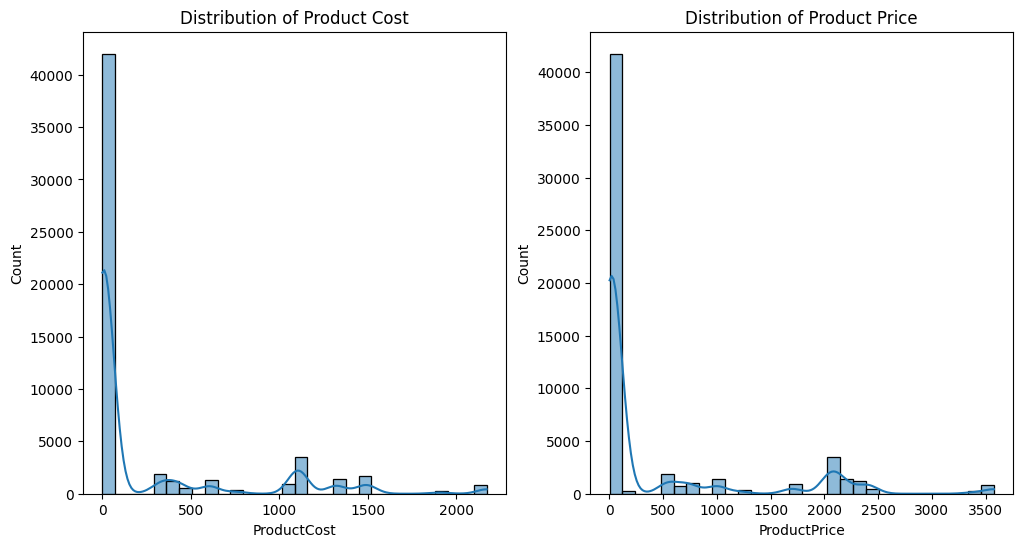

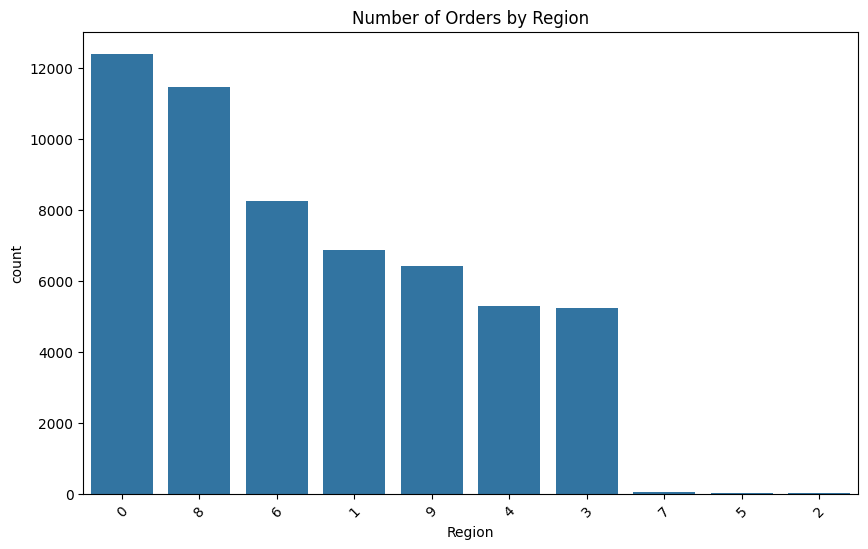

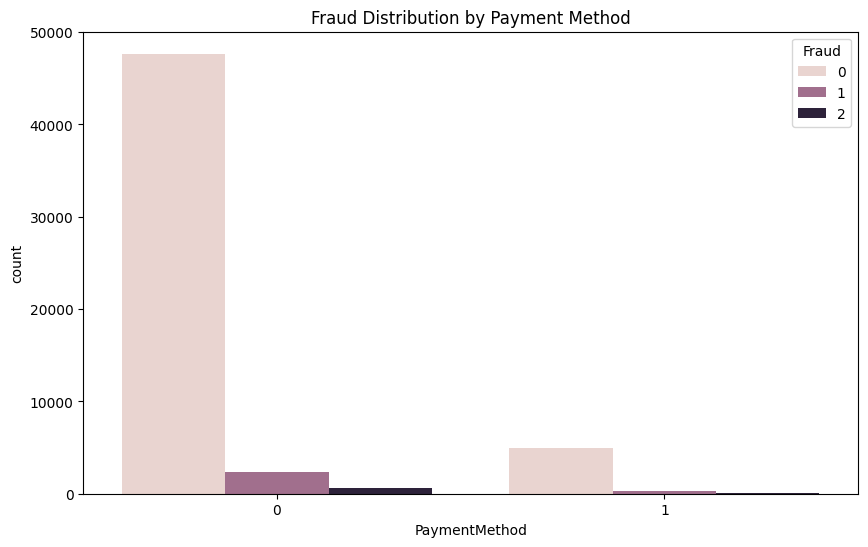

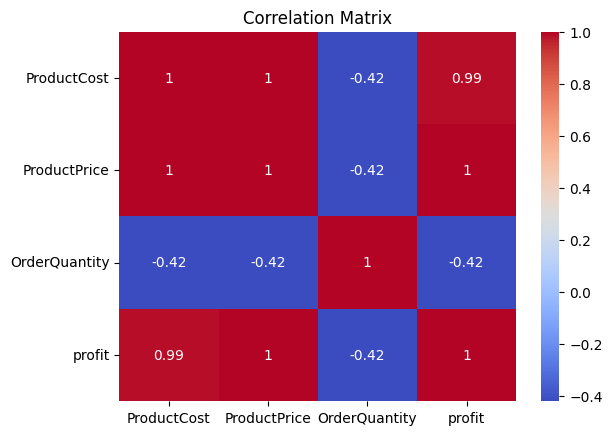

In [ ]:
# Summary statistics for numerical columns
print(df[['ProductCost', 'ProductPrice', 'OrderQuantity', 'profit']].describe())

# Distribution of ProductCost and ProductPrice
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ProductCost'], bins=30, kde=True)
plt.title('Distribution of Product Cost')

plt.subplot(1, 2, 2)
sns.histplot(df['ProductPrice'], bins=30, kde=True)
plt.title('Distribution of Product Price')
plt.show()

# Number of orders by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Number of Orders by Region')
plt.xticks(rotation=45)
plt.show()

# Fraud distribution by PaymentMethod
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Fraud')
plt.title('Fraud Distribution by Payment Method')
plt.show()

# Correlation matrix
corr_matrix = df[['ProductCost', 'ProductPrice', 'OrderQuantity', 'profit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df1 = df.drop(columns=['OrderID', 'Region', 'Country', 'CustID', 'Customer_Name', 'ProductSKU',
       'Product_Category', 'OrderLineItem',
       'OrderDate', 'AcquisitionSource',
       'PaymentMethod', 'CardType', 'Gender'], axis=1)

<Axes: >

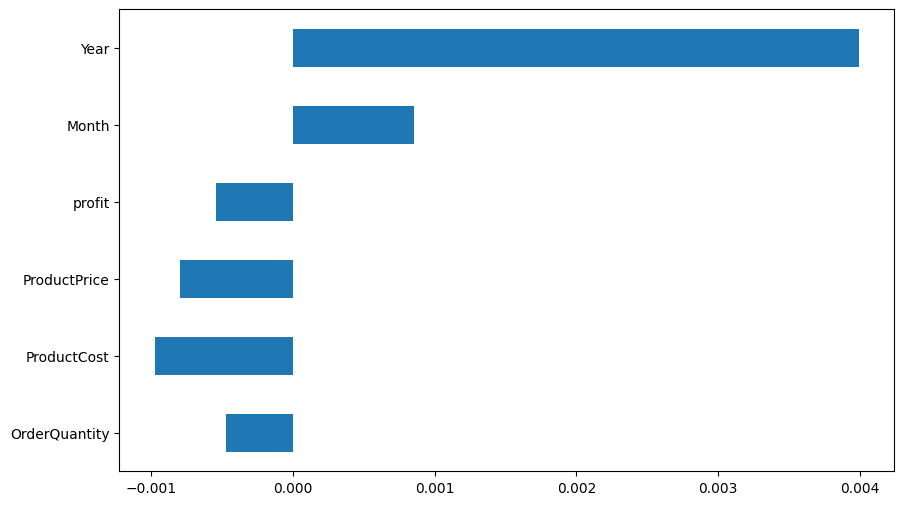

In [ ]:
correlation_values = df1.corr()['Fraud'].drop('Fraud')
correlation_values.plot(kind='barh', figsize=(10, 6))

# **Step 6: Fraud Detection Model**

In [ ]:
# Prepare data for modeling
X = df[['Region',
       'OrderQuantity', 'ProductCost',
       'ProductPrice',
       'PaymentMethod']]
y=df['Fraud']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.isnull().sum())  # Show count of NaNs per column


Region           0
OrderQuantity    0
ProductCost      0
ProductPrice     0
PaymentMethod    0
dtype: int64


In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train.dropna(), y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10541     0     0]
 [  511     0     0]
 [  130     0     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10541
           1       0.00      0.00      0.00       511
           2       0.00      0.00      0.00       130

    accuracy                           0.94     11182
   macro avg       0.31      0.33      0.32     11182
weighted avg       0.89      0.94      0.91     11182



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

# **Step 7: Customer Segmentation (K-Means Clustering)**

In [ ]:
df['Profit'] = df['ProductPrice'] - df['ProductCost']  # Example calculation


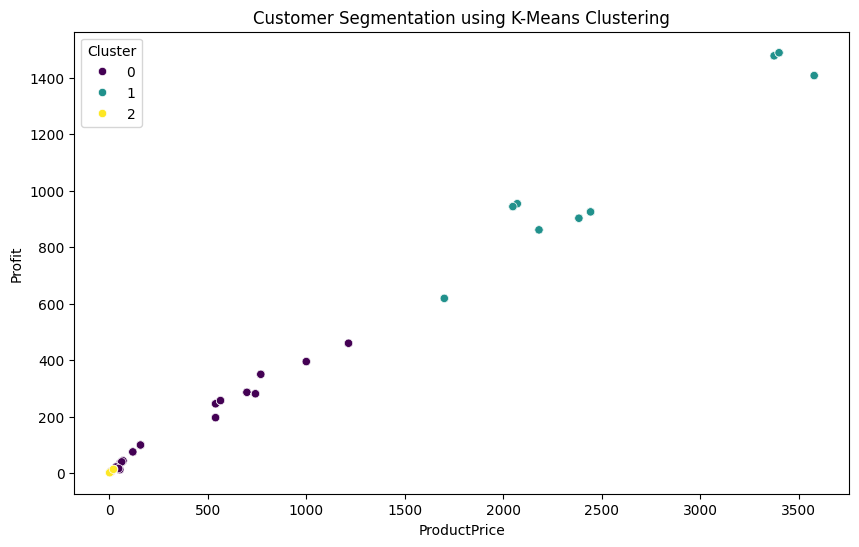

In [ ]:
# Prepare data for clustering
cluster_data = df[['ProductCost', 'ProductPrice', 'OrderQuantity', 'Profit']]

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ProductPrice', y='Profit', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.show()

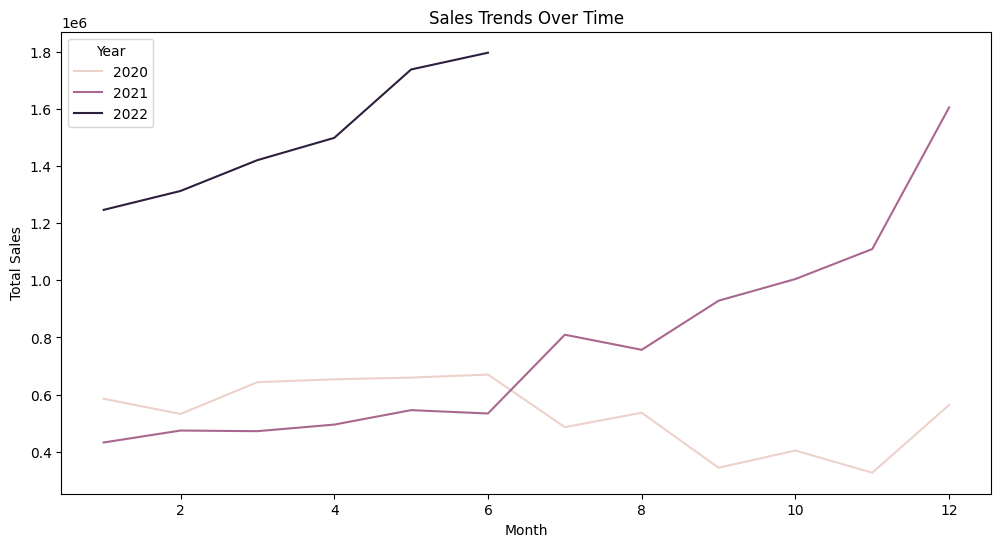

In [ ]:
# Group by month and year to analyze sales trends
sales_trend = df.groupby(['Year', 'Month'])['ProductPrice'].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Month', y='ProductPrice', hue='Year')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Step 9: Present Findings

In [ ]:
# Key Insights
print("Key Insights:")
print(f"1. Total Profit: {df['Profit'].sum()}")
print(f"2. Most Common Payment Method: {df['PaymentMethod'].mode()[0]}")
print(f"3. Fraud Rate: {df['Fraud'].mean() * 100:.2f}%")

# Save the cleaned dataset for further analysis
df.to_csv('Cleaned_Order_Data.csv', index=False)

Key Insights:
1. Total Profit: 10258771.330400003
2. Most Common Payment Method: 0
3. Fraud Rate: 7.17%
